In [22]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
file_path = '/content/GERUSOPPA data.xlsx'
data = pd.read_excel(file_path)
data.columns = ['Date', 'Level', 'Storage', 'Unused1', 'Unused2']
data = data[['Date', 'Storage']]
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date', 'Storage'])
data['Storage'] = pd.to_numeric(data['Storage'], errors='coerce')
data = data.dropna()

<ipython-input-22-785bf887b485>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [23]:
# Train-test split (80% train, 20% test)
train_size = int(len(data_prophet) * 0.8)
train = data_prophet[:train_size]
test = data_prophet[train_size:]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train)

# Create future dataframe for the test period
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

# Filter the forecast for the test period
forecast_test = forecast[forecast['ds'].isin(test['ds'].values)].reset_index(drop=True)
test = test.reset_index(drop=True)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5y917c_t/le339ysz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5y917c_t/mjnf81yq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92648', 'data', 'file=/tmp/tmp5y917c_t/le339ysz.json', 'init=/tmp/tmp5y917c_t/mjnf81yq.json', 'output', 'file=/tmp/tmp5y917c_t/prophet_modelrwxhk_tr/prophet_model-20241212111307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
# Create future dataframe for the test period
# Instead of generating future dates, use the existing dates in the test set
future = pd.DataFrame({'ds': test['ds']})
forecast = model.predict(future)

# Filter the forecast for the test period (no longer needed)
# forecast_test = forecast[forecast['ds'].isin(test['ds'].values)].reset_index(drop=True)
# test = test.reset_index(drop=True)

# Now forecast and test should have the same number of rows
# Calculate and print performance metrics
mae = mean_absolute_error(test['y'], forecast['yhat'])
mse = mean_squared_error(test['y'], forecast['yhat'])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.010109352023831102
Mean Squared Error (MSE): 0.0005407487809838646
Root Mean Squared Error (RMSE): 0.023254005697596804


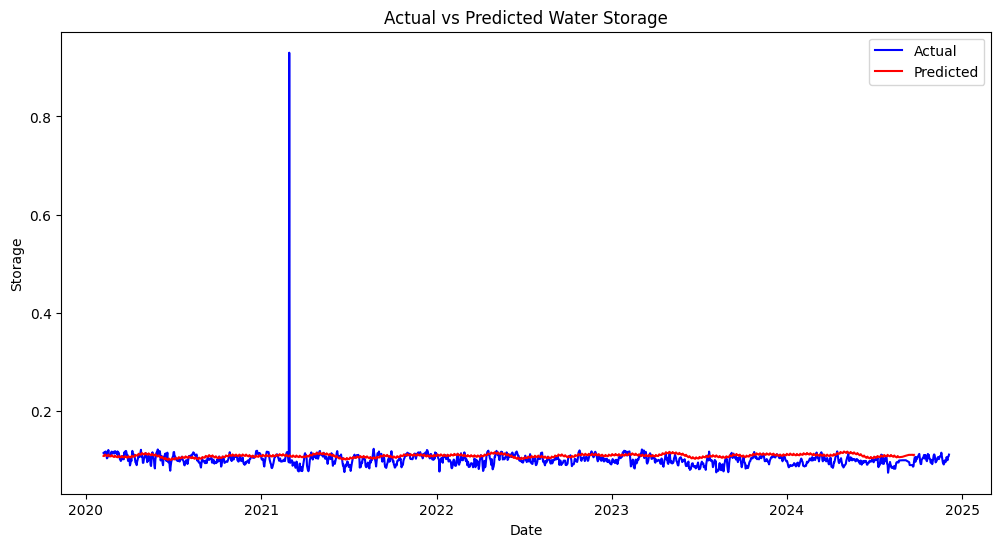

In [25]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted', color='red')
plt.title('Actual vs Predicted Water Storage')
plt.xlabel('Date')
plt.ylabel('Storage')
plt.legend()
plt.show()

In [26]:
print(forecast_test['yhat'])

0       0.107852
1       0.107541
2       0.108679
3       0.110658
4       0.109565
          ...   
1622    0.109950
1623    0.110179
1624    0.109682
1625    0.109070
1626    0.109897
Name: yhat, Length: 1627, dtype: float64


In [27]:
print(test['y'])

0       0.11378
1       0.11239
2       0.11527
3       0.11499
4       0.11668
         ...   
1685    0.10095
1686    0.09907
1687    0.10618
1688    0.10661
1689    0.11055
Name: y, Length: 1690, dtype: float64


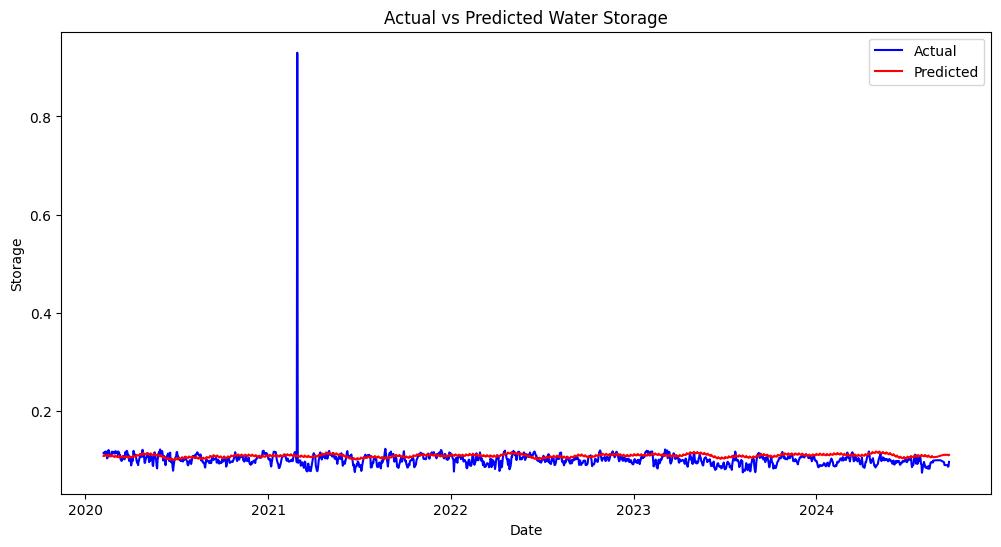

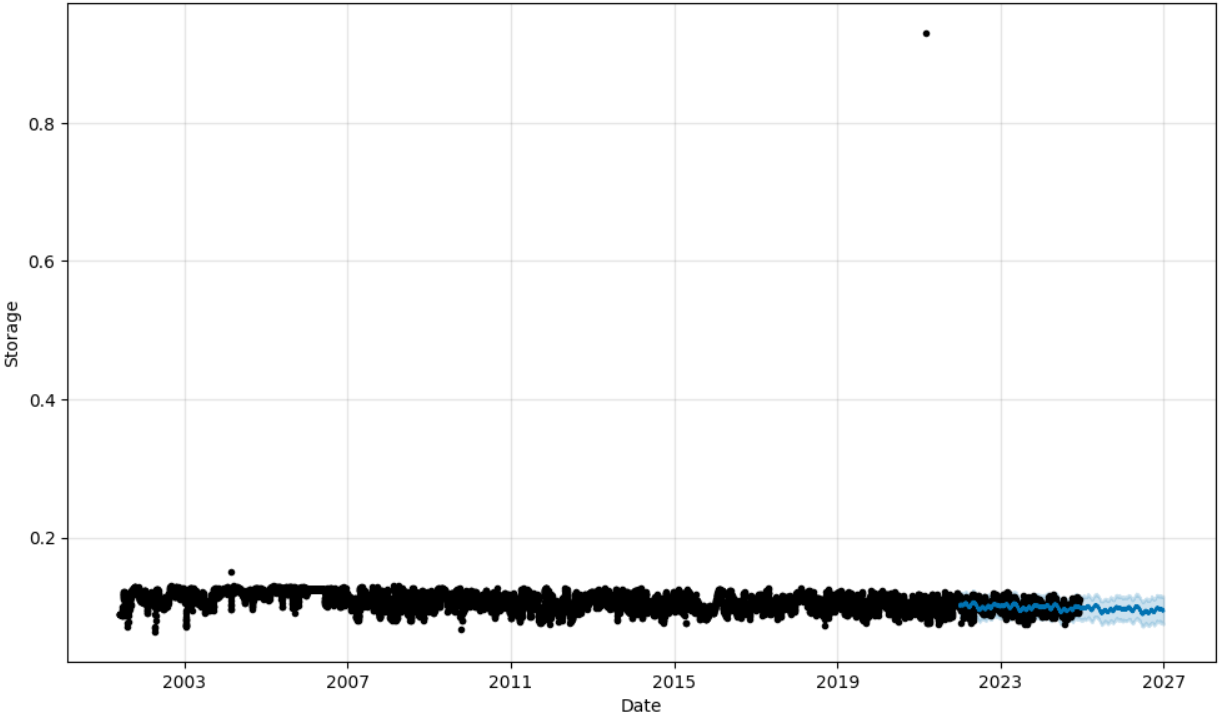